In [1]:
import pandas as pd
import numpy as np
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.externals import joblib

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# import datetime
def date_diff(date):
    first_new_year=str(date[0:4])+"-01-01 00:00:00"
    date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    first_new_year = datetime.strptime(first_new_year, '%Y-%m-%d %H:%M:%S')
    return (date-first_new_year).days

In [3]:
df_bike_data = pd.read_csv("bike_data.csv")

In [4]:
df_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [5]:
df_bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


Feature engineering

In [6]:
df_bike_data["hour"] = df_bike_data.datetime.apply(lambda x : int(x.split()[1].split(":")[0]))

In [7]:
df_bike_data["date"] = df_bike_data.datetime.apply(lambda x : x.split()[0])

In [8]:
df_bike_data["weekday"] = df_bike_data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [9]:
df_bike_data['date_newyear_num']=df_bike_data["datetime"].apply(lambda x : date_diff(x))

In [10]:
df_bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,date,weekday,date_newyear_num
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,2011-01-01,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,2011-01-01,Saturday,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,2011-01-01,Saturday,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,2011-01-01,Saturday,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,2011-01-01,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,2012-12-19,Wednesday,353
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,2012-12-19,Wednesday,353
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,2012-12-19,Wednesday,353
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,22,2012-12-19,Wednesday,353


In [11]:
cols = list(df_bike_data)
cols

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'count',
 'hour',
 'date',
 'weekday',
 'date_newyear_num']

In [12]:
cols.insert(len(cols), cols.pop(cols.index('count')))
cols

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'hour',
 'date',
 'weekday',
 'date_newyear_num',
 'count']

In [13]:
df_bike_data = df_bike_data.loc[:, cols]

In [14]:
df_bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,date,weekday,date_newyear_num,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,0,2011-01-01,Saturday,0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,1,2011-01-01,Saturday,0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,2011-01-01,Saturday,0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,2011-01-01,Saturday,0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,4,2011-01-01,Saturday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,19,2012-12-19,Wednesday,353,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,20,2012-12-19,Wednesday,353,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,21,2012-12-19,Wednesday,353,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,22,2012-12-19,Wednesday,353,129


Data visualization

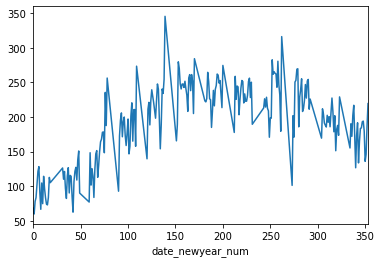

In [15]:
df_bike_data.groupby('date_newyear_num')['count'].mean().plot(kind='line')

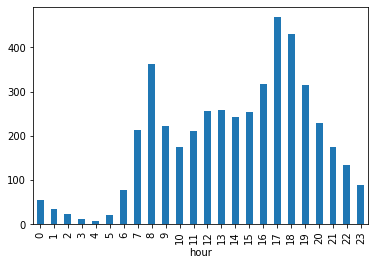

In [16]:
df_bike_data.groupby('hour')['count'].mean().plot(kind='bar')

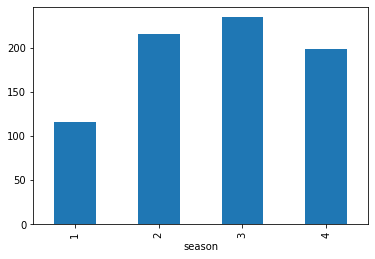

In [17]:
df_bike_data.groupby('season')['count'].mean().plot(kind='bar')

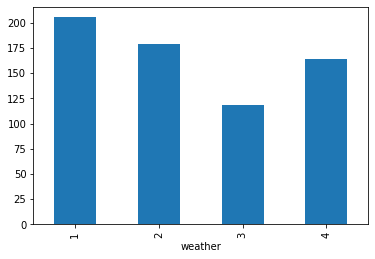

In [18]:
df_bike_data.groupby('weather')['count'].mean().plot(kind='bar')

In [19]:
df_bike_data['temp_int']=df_bike_data.temp.apply(lambda x: int(x))
df_bike_data['atemp_int']=df_bike_data.atemp.apply(lambda x: int(x))
df_bike_data['humidity_int']=df_bike_data.humidity.apply(lambda x: int(x))
df_bike_data['windspeed_int']=df_bike_data.windspeed.apply(lambda x: int(x))

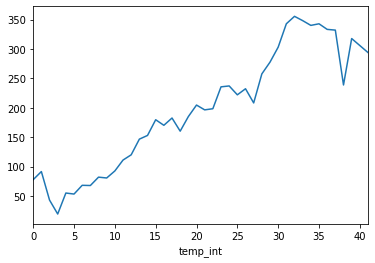

In [20]:
df_bike_data.groupby('temp_int')['count'].mean().plot(kind='line')

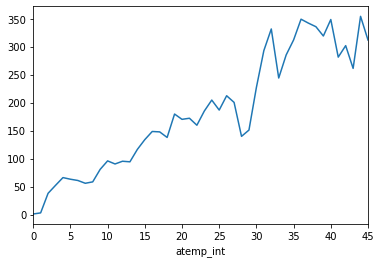

In [21]:
df_bike_data.groupby('atemp_int')['count'].mean().plot(kind='line')

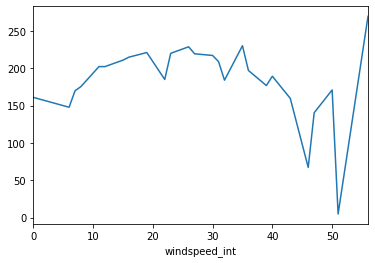

In [22]:
df_bike_data.groupby('windspeed_int')['count'].mean().plot(kind='line')

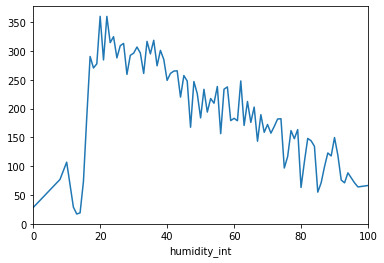

In [23]:
df_bike_data.groupby('humidity_int')['count'].mean().plot(kind='line')

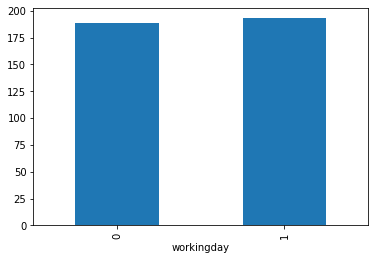

In [24]:
df_bike_data.groupby('workingday')['count'].mean().plot(kind='bar')

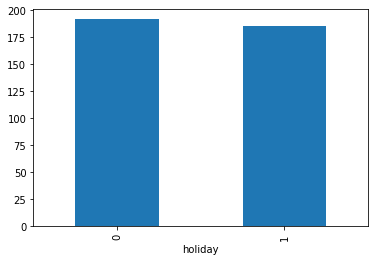

In [25]:
df_bike_data.groupby('holiday')['count'].mean().plot(kind='bar')

In [26]:
df_bike_data = df_bike_data.drop(['temp_int', 'atemp_int', 'humidity_int', 'windspeed_int'], axis=1)

In [27]:
corrMatt = df_bike_data.corr()
corrMatt

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,date_newyear_num,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,-0.006546,0.970196,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.000354,0.001134,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.002780,-0.003024,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.022740,0.011746,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.145430,0.255887,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.140343,0.262245,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.278011,0.203155,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.146631,-0.148062,0.101369
hour,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,1.000000,-0.006735,0.400601
date_newyear_num,0.970196,0.001134,-0.003024,0.011746,0.255887,0.262245,0.203155,-0.148062,-0.006735,1.000000,0.168056


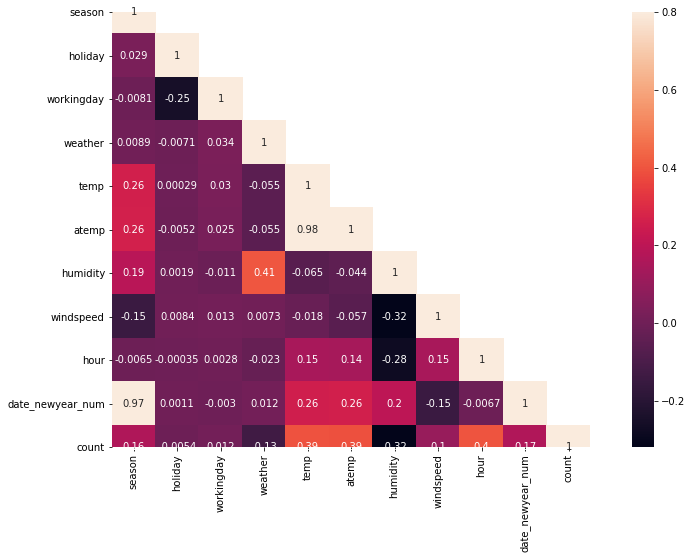

In [28]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

The outliers

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

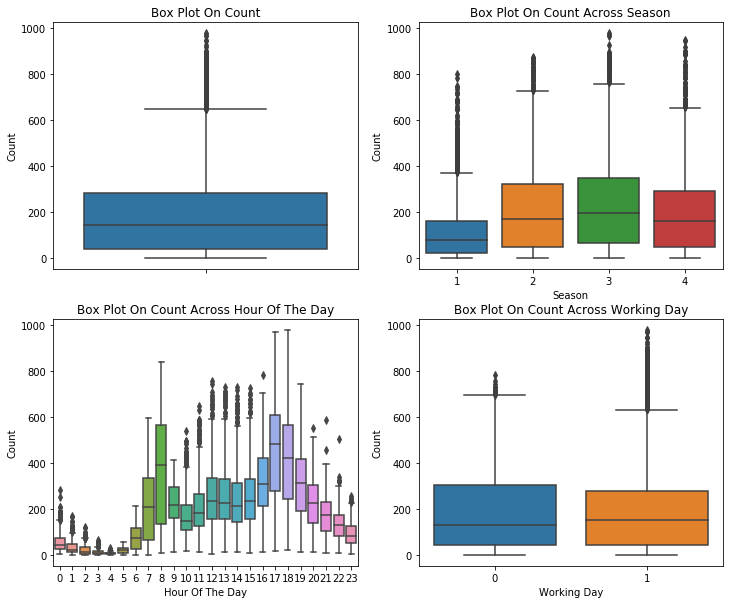

In [29]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=df_bike_data,y="count",ax=axes[0][0])
sn.boxplot(data=df_bike_data,y="count",x="season",ax=axes[0][1])
sn.boxplot(data=df_bike_data,y="count",x="hour",ax=axes[1][0])
sn.boxplot(data=df_bike_data,y="count",x="workingday",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [34]:
df_bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,date_newyear_num,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,11.541613,176.562466,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,6.915838,105.055551,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,6.000000,91.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,12.000000,181.500000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,18.000000,273.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,23.000000,353.000000,977.000000


In [35]:
outliers=np.abs(df_bike_data["count"]-df_bike_data["count"].mean()) >(3*df_bike_data["count"].std())

In [36]:
outliers = pd.DataFrame(outliers)

In [37]:
outliers

,count
0,False
1,False
2,False
3,False
4,False
...,...
10881,False
10882,False
10883,False
10884,False


In [38]:
df_bike_data.iloc[6658]

datetime            2012-03-14 17:00:00
season                                1
holiday                               0
workingday                            1
weather                               1
temp                               28.7
atemp                             31.82
humidity                             28
windspeed                        6.0032
hour                                 17
date                         2012-03-14
weekday                       Wednesday
date_newyear_num                     73
count                               782
Name: 6658, dtype: object

In [39]:

outliers_list = outliers.loc[outliers["count"]==True]._stat_axis.values.tolist()

In [40]:
len(outliers_list)

147

In [41]:
df_bike_data = df_bike_data.drop(index=outliers_list)
df_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 10885
Data columns (total 14 columns):
datetime            10739 non-null object
season              10739 non-null int64
holiday             10739 non-null int64
workingday          10739 non-null int64
weather             10739 non-null int64
temp                10739 non-null float64
atemp               10739 non-null float64
humidity            10739 non-null int64
windspeed           10739 non-null float64
hour                10739 non-null int64
date                10739 non-null object
weekday             10739 non-null object
date_newyear_num    10739 non-null int64
count               10739 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.2+ MB


This is a regression problem, so if the target value follows a normal distribution, it will work well for many models.

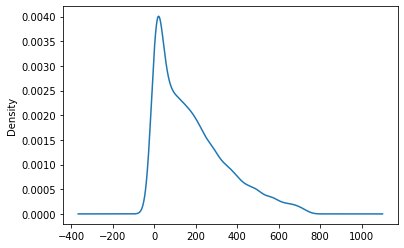

In [42]:
df_bike_data["count"].plot(kind = 'kde')

This graph is not a good normal distribution. Therefore, it may be difficult to use a linear model.

In [44]:

df_bike_data=pd.get_dummies(df_bike_data,columns=['season'])
df_bike_data=pd.get_dummies(df_bike_data,columns=['weather'])


In [45]:
df_bike_data=pd.get_dummies(df_bike_data,columns=['weekday'])

In [46]:
df_bike_data.columns.values

array(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'hour', 'date', 'date_newyear_num', 'count',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype=object)

In [48]:
df_bike_data.to_csv("bike_data_new.csv")
df_bike_data

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,hour,date,date_newyear_num,...,weather_2,weather_3,weather_4,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,0,2011-01-01,0,...,0,0,0,0,0,1,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,1,2011-01-01,0,...,0,0,0,0,0,1,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,2,2011-01-01,0,...,0,0,0,0,0,1,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,3,2011-01-01,0,...,0,0,0,0,0,1,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,4,2011-01-01,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,19,2012-12-19,353,...,0,0,0,0,0,0,0,0,0,1
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,20,2012-12-19,353,...,0,0,0,0,0,0,0,0,0,1
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,21,2012-12-19,353,...,0,0,0,0,0,0,0,0,0,1
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,22,2012-12-19,353,...,0,0,0,0,0,0,0,0,0,1


machine learning

In [5]:
df = pd.read_csv("bike_data_new.csv", index_col=0)

In [6]:
X_feature = [col for col in df.columns.values if col != 'count' and col != "datetime" and col != "date"]
y_feature = ['count']
X = df.loc[:,X_feature]
y = df.loc[:,y_feature]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
X_train

,holiday,workingday,temp,atemp,humidity,windspeed,hour,date_newyear_num,season_1,season_2,...,weather_2,weather_3,weather_4,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
10230,0,0,22.14,25.760,42,15.0013,16,315,0,0,...,0,0,0,0,0,0,1,0,0,0
5312,0,1,16.40,20.455,58,19.9995,10,348,0,0,...,1,0,0,0,0,0,0,1,0,0
1568,0,1,18.86,22.725,100,15.0013,6,100,0,1,...,1,0,0,0,1,0,0,0,0,0
10447,0,0,13.94,17.425,76,7.0015,17,335,0,0,...,1,0,0,0,0,1,0,0,0,0
6754,0,0,22.96,26.515,64,6.0032,17,77,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,0,1,10.66,15.150,75,0.0000,4,347,0,0,...,0,0,0,0,0,0,0,0,0,1
7390,0,1,19.68,23.485,82,7.0015,7,127,0,1,...,1,0,0,0,1,0,0,0,0,0
7304,0,1,29.52,33.335,54,8.9981,17,123,0,1,...,0,0,0,0,0,0,0,1,0,0
6875,0,1,27.06,31.060,39,15.0013,19,94,0,1,...,0,0,0,0,0,0,0,0,0,1


In [183]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from tqdm import *
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.externals import joblib

In [184]:
def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

def rmse(y_test, y_pred):
    return sqrt(mean_squared_error(y_test,y_pred))

Ridge Regression

In [185]:
estimator = Ridge()
parameters = { 
    'alpha':[0.1, 1, 2, 3, 4, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]
}
rmse_scorer = metrics.make_scorer(rmse, greater_is_better=False)
grid_Ridge = GridSearchCV( estimator,
                          param_grid=parameters,
                          scoring = rmse_scorer,
                          cv=5)

grid_Ridge.fit(X=X_train,y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(rmse, greater_is_better=False), verbose=0)

In [186]:
means = grid_Ridge.cv_results_['mean_test_score']
params = grid_Ridge.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(grid_Ridge.best_params_)
print(grid_Ridge.best_score_)

-134.399210  with:   {'alpha': 0.1}
-134.398592  with:   {'alpha': 1}
-134.398015  with:   {'alpha': 2}
-134.397489  with:   {'alpha': 3}
-134.396997  with:   {'alpha': 4}
-134.394521  with:   {'alpha': 10}
-134.391688  with:   {'alpha': 20}
-134.390027  with:   {'alpha': 30}
-134.389240  with:   {'alpha': 40}
-134.389140  with:   {'alpha': 50}
-134.389600  with:   {'alpha': 60}
-134.390529  with:   {'alpha': 70}
-134.391861  with:   {'alpha': 80}
-134.393542  with:   {'alpha': 90}
-134.395530  with:   {'alpha': 100}
-134.426485  with:   {'alpha': 200}
{'alpha': 50}
-134.3891395440253


In [187]:
pre=grid_Ridge.predict(X_test)
print(rmse(y_test, pre))

133.99885036027217


In [188]:
R = Ridge(alpha = grid_Ridge.best_params_["alpha"])
R.fit(X=X_train,y=y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [261]:
pre=R.predict(X_test)
print("RMSE of Ridge Regression: ", rmse(y_test, pre))

RMSE of Ridge Regression:  133.99885036027217


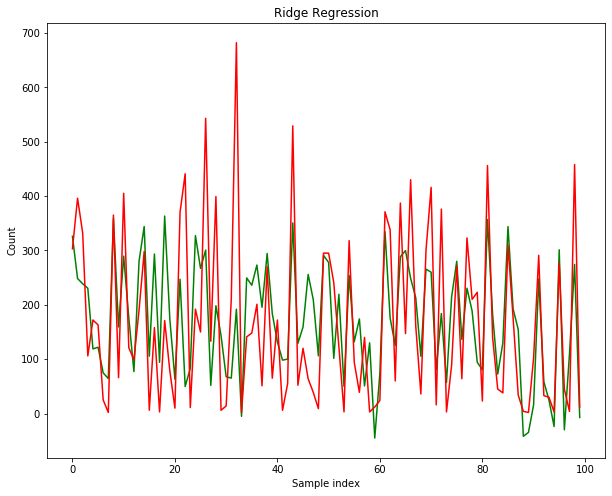

In [262]:
x_axix = list(range(100))
plt.figure(figsize=(10,8))
plt.title('Ridge Regression')
plt.plot(x_axix, pre[0:100], color='green', label='Prediction')
plt.plot(x_axix, y_test[0:100], color='red', label='Reality')
plt.xlabel('Sample index')
plt.ylabel('Count')
plt.show()

In [190]:
with open('Ridge.pkl', 'wb') as f:
    joblib.dump(R, 'Ridge.pkl')

Lasso Regression

In [191]:
estimator = Lasso()
parameters = { 
    'alpha':[0.1, 1, 2, 3, 4, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]
}
rmse_scorer = metrics.make_scorer(rmse, greater_is_better=False)
grid_Lasso = GridSearchCV( estimator,
                          param_grid=parameters,
                          scoring = rmse_scorer,
                          cv=5)

grid_Lasso.fit(X=X_train,y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(rmse, greater_is_better=False), verbose=0)

In [192]:
means = grid_Lasso.cv_results_['mean_test_score']
params = grid_Lasso.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(grid_Lasso.best_params_)
print(grid_Lasso.best_score_)

-134.369289  with:   {'alpha': 0.1}
-134.515452  with:   {'alpha': 1}
-134.869226  with:   {'alpha': 2}
-135.164969  with:   {'alpha': 3}
-135.443266  with:   {'alpha': 4}
-135.774376  with:   {'alpha': 10}
-135.817665  with:   {'alpha': 20}
-135.880357  with:   {'alpha': 30}
-135.962643  with:   {'alpha': 40}
-136.064948  with:   {'alpha': 50}
-136.192777  with:   {'alpha': 60}
-136.343607  with:   {'alpha': 70}
-136.517362  with:   {'alpha': 80}
-136.713955  with:   {'alpha': 90}
-136.933282  with:   {'alpha': 100}
-140.347819  with:   {'alpha': 200}
{'alpha': 0.1}
-134.3692894705198


In [193]:
pre=grid_Lasso.predict(X_test)

In [194]:
rmse(y_test, pre)

133.99936740850274

In [195]:
L = Lasso(alpha = grid_Lasso.best_params_["alpha"])
L.fit(X=X_train,y=y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [263]:
pre=L.predict(X_test)
print("RMSE of Lasso Regression: ", rmse(y_test, pre))

RMSE of Lasso Regression:  133.99936740850274


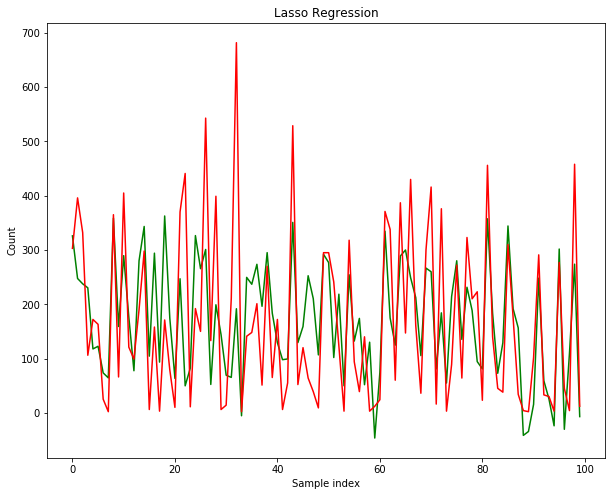

In [264]:
x_axix = list(range(100))
plt.figure(figsize=(10,8))
plt.title('Lasso Regression')
plt.plot(x_axix, pre[0:100], color='green', label='Prediction')
plt.plot(x_axix, y_test[0:100], color='red', label='Reality')
plt.xlabel('Sample index')
plt.ylabel('Count')
plt.show()

In [197]:
with open('Lasso.pkl', 'wb') as f:
    joblib.dump(L, 'Lasso.pkl')

GradientBoostingRegressor

In [198]:
estimator = GradientBoostingRegressor()
parameters = { 
    'n_estimators':[100,500,1000],
    'learning_rate': [0.1,0.05,0.02],
    'max_depth':[4,3,2],
    'min_samples_leaf':[1,2,3]
}
rmse_scorer = metrics.make_scorer(rmse, greater_is_better=False)
grid_GBR = GridSearchCV( estimator,
                          param_grid=parameters,
                          scoring = rmse_scorer,
                          cv=5)

grid_GBR.fit(X=X_train,y=y_train.to_numpy().ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [199]:
means = grid_GBR.cv_results_['mean_test_score']
params = grid_GBR.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(grid_GBR.best_params_)
print(grid_GBR.best_score_)

-68.318905  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 100}
-57.839896  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 500}
-54.521630  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 1000}
-68.114854  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
-58.035942  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 500}
-54.718444  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 1000}
-67.752748  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 100}
-57.691924  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 500}
-54.341933  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 1000}
-77.624306  with:   {'learning_rate': 0.1, 'max_depth': 3, 'min_sample

In [200]:
pre=grid_GBR.predict(X_test)

In [201]:
rmse(y_test, pre)

53.87434618448344

In [202]:
GBR = GradientBoostingRegressor(n_estimators = grid_GBR.best_params_["n_estimators"],
                               learning_rate = grid_GBR.best_params_["learning_rate"],
                               max_depth = grid_GBR.best_params_["max_depth"],
                               min_samples_leaf = grid_GBR.best_params_["min_samples_leaf"])
GBR.fit(X=X_train,y=y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [265]:
pre=GBR.predict(X_test)
print("RMSE of Gradient Boosting Regression: ", rmse(y_test, pre))

RMSE of Gradient Boosting Regression:  53.92404364992904


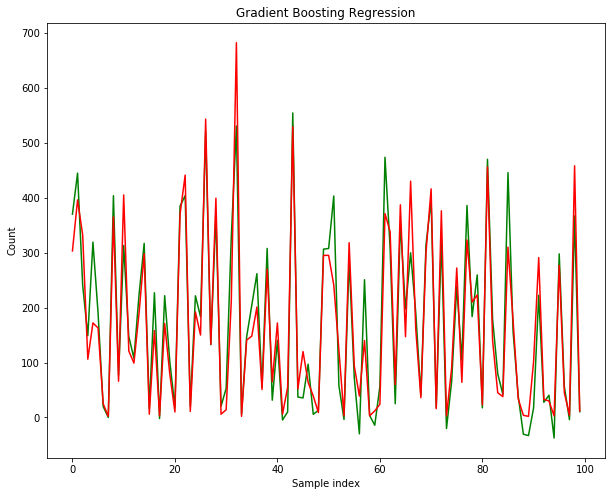

In [266]:
x_axix = list(range(100))
plt.figure(figsize=(10,8))
plt.title('Gradient Boosting Regression')
plt.plot(x_axix, pre[0:100], color='green', label='Prediction')
plt.plot(x_axix, y_test[0:100], color='red', label='Reality')
plt.xlabel('Sample index')
plt.ylabel('Count')
plt.show()

In [204]:
with open('GBR.pkl', 'wb') as f:
    joblib.dump(GBR, 'GBR.pkl')

Random Forest Regressor

In [271]:
estimator = RandomForestRegressor()
parameters = { 
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 1000, 2000],
    'random_state' : [0],
    'n_jobs' : [-1]
}
rmse_scorer = metrics.make_scorer(rmse, greater_is_better=False)
grid_RFR = GridSearchCV( estimator,
                          param_grid=parameters,
                          scoring = rmse_scorer,
                          cv=5)

grid_RFR.fit(X=X_train,y=y_train.to_numpy().ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': [1, 2, 4],


In [272]:
means = grid_RFR.cv_results_['mean_test_score']
params = grid_RFR.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(grid_RFR.best_params_)
print(grid_RFR.best_score_)

-63.481163  with:   {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
-63.141257  with:   {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}
-63.167549  with:   {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': 0}
-63.781904  with:   {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
-63.498081  with:   {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}
-63.495629  with:   {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': 0}
-64.486936  with:   {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
-64.269204  with:   {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}
-64.265853  with:

In [273]:
pre=grid_RFR.predict(X_test)
rmse(y_test, pre)

60.63702003097711

In [274]:
RFR = RandomForestRegressor(min_samples_leaf = grid_RFR.best_params_["min_samples_leaf"],
                            min_samples_split = grid_RFR.best_params_["min_samples_split"],
                            n_estimators = grid_RFR.best_params_["n_estimators"],
                            random_state=0, 
                            n_jobs=-1)
RFR.fit(X=X_train,y=y_train.to_numpy().ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [275]:
pre=RFR.predict(X_test)
print("RMSE of Random Forest Regression: ", rmse(y_test, pre))

RMSE of Random Forest Regression:  60.63702003097711


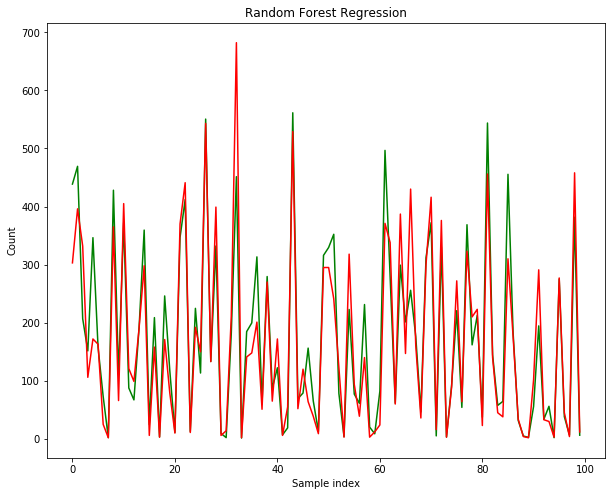

In [276]:
x_axix = list(range(100))
plt.figure(figsize=(10,8))
plt.title('Random Forest Regression')
plt.plot(x_axix, pre[0:100], color='green', label='Prediction')
plt.plot(x_axix, y_test[0:100], color='red', label='Reality')
plt.xlabel('Sample index')
plt.ylabel('Count')
plt.show()

In [277]:
with open('RFR.pkl', 'wb') as f:
    joblib.dump(RFR, 'RFR.pkl')

In [2]:
GBR = joblib.load("GBR.pkl")

The most important features

In [3]:
GBR.feature_importances_

array([1.60689680e-03, 1.06719521e-01, 7.97785038e-02, 5.54262904e-02,
       3.82011595e-02, 8.46414327e-03, 5.93355208e-01, 7.59717523e-02,
       1.24047673e-04, 1.10923905e-03, 5.28060562e-04, 3.03397804e-04,
       1.50284670e-03, 1.69368504e-03, 1.51074724e-02, 0.00000000e+00,
       4.93476098e-03, 2.39718088e-03, 3.03864081e-03, 4.41692658e-03,
       2.18720244e-03, 1.14916665e-03, 1.98389708e-03])

In [7]:
X_feature

['holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'hour',
 'date_newyear_num',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_Friday',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday']

In [10]:
indies = np.argsort(GBR.feature_importances_, kind='heapsort')[::-1]

In [11]:
indies

array([ 6,  1,  2,  7,  3,  4, 14,  5, 16, 19, 18, 17, 20, 22, 13,  0, 12,
       21,  9, 10, 11,  8, 15], dtype=int64)

In [12]:
for index in indies:
    print({X_feature[index]:GBR.feature_importances_[index]})

{'hour': 0.593355208085962}
{'workingday': 0.10671952113880932}
{'temp': 0.07977850380735288}
{'date_newyear_num': 0.07597175226235119}
{'atemp': 0.05542629044258905}
{'humidity': 0.03820115950369972}
{'weather_3': 0.015107472449604325}
{'windspeed': 0.008464143265335906}
{'weekday_Friday': 0.004934760983437159}
{'weekday_Sunday': 0.0044169265760004}
{'weekday_Saturday': 0.003038640805841391}
{'weekday_Monday': 0.0023971808811316542}
{'weekday_Thursday': 0.002187202435353487}
{'weekday_Wednesday': 0.00198389707598306}
{'weather_2': 0.0016936850410661094}
{'holiday': 0.001606896802288471}
{'weather_1': 0.00150284670394668}
{'weekday_Tuesday': 0.0011491666500215891}
{'season_2': 0.0011092390504167974}
{'season_3': 0.0005280605621068505}
{'season_4': 0.00030339780369843485}
{'season_1': 0.0001240476730034785}
{'weather_4': 0.0}


In [42]:
list_importances = [{X_feature[index]:GBR.feature_importances_[index]} for index in indies]
keys = [list(list_importances[i].keys())[0] for i in range(len(list_importances))]
values = np.sort(GBR.feature_importances_)[::-1]

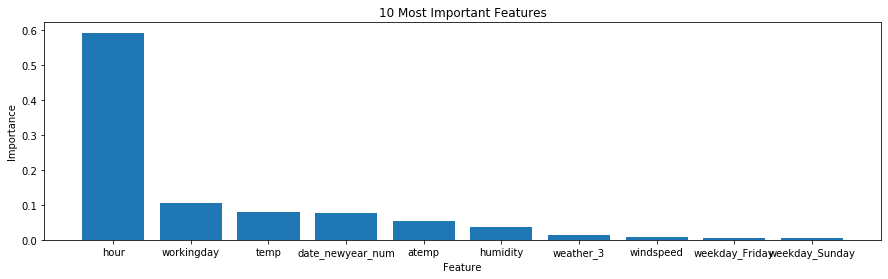

In [45]:

plt.figure(figsize=(15,4))
plt.title('10 Most Important Features')
plt.bar(keys[0:10], values[0:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()